<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [32]:
# library and package imports
import pandas as pd

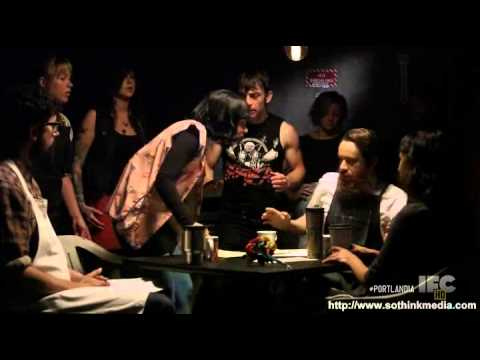

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/ash/Code/unit4/env Testing area'

In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)


In [15]:
shops.head(3)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating


In [171]:
shops.shape

(7616, 5)

In [17]:
df=shops

In [4]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [177]:
#useful Function:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

### Notes

1. reduce the rating column to a single number

alt:
https://www.geeksforgeeks.org/python-extract-digits-from-given-string/
https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/

2. dates? Are these important?
# Convert date_recorded to datetime
 X['date'] = pd.to_datetime(df['full_review_text'], infer_datetime_format=True)
 
3. 

In [136]:
#Cleaning
shops['star_ratings'] = shops['star_ratings'].replace(" 5.0 star rating ", "5")
shops['star_ratings'] = shops['star_ratings'].replace(" 4.0 star rating ", "4")
shops['star_ratings'] = shops['star_ratings'].replace(" 3.0 star rating ", "3")
shops['star_ratings'] = shops['star_ratings'].replace(" 2.0 star rating ", "2")
shops['star_ratings'] = shops['star_ratings'].replace(" 1.0 star rating ", "1")

In [141]:
#Cleaning
shops.astype({'star_ratings': 'int64'}).dtypes


coffee_shop_name    object
full_review_text    object
star_rating         object
tokens              object
star_ratings         int64
dtype: object

In [142]:
# turning the star rating into a number
#re.sub(r'[^0-9]', '.', text)

In [143]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens,star_ratings
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[11/25/2016, check-in, love, love, loved, atmo...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[12/2/2016, listed, date, night:, austin,, amb...",4


In [144]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [145]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [146]:
df['tokens'].head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

In [148]:
wc = count(df['tokens'])

In [149]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
15,,7616,22606,1.0,0.053592,0.053592,1.000000
3,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
99,place,3029,4264,3.0,0.010109,0.082803,0.397715
109,great,2438,3250,4.0,0.007705,0.090508,0.320116
288,it's,2061,3117,5.0,0.007389,0.097897,0.270614


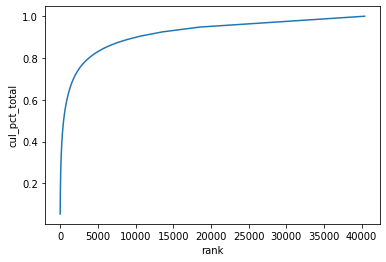

In [150]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [151]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.158392580704046

In [152]:
wc[wc['rank'] <= 60]['cul_pct_total'].max()

0.2419402634779372

In [153]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.2954798148020834

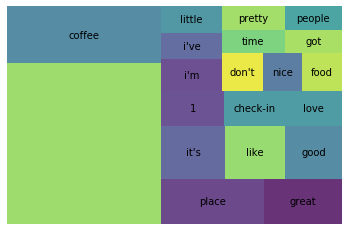

In [154]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [155]:
#  count the raw text?
# df['full_review_text'].value_counts(normalize=True)[:50]

In [156]:
#  count the raw text?
# df['tokens'].value_counts(normalize=True)[:50]

Various words were removed after looking at the top counts the best and worse reviews.
For example the words 'like' 'place' and 'coffee' were used regardless of positive or negative.

However, unlike the word coffee (which appeared everywhere) the word latte appeared only in the good reviews, and so was not removed.

In [157]:
#Extending Stop Words

#print(type(nlp.Defaults.stop_words))
#<class 'set'>

STOP_WORDS = nlp.Defaults.stop_words.union(['1', 'like', 'place', ' ', '-', 'coffee', 'coffee.', "i'm", "i've", "don't", "it.", "it's", 'austin'])

Now that we have updated and customized out stop-words list, we have an improved selection of tokens.

In [158]:
tokens = []

for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

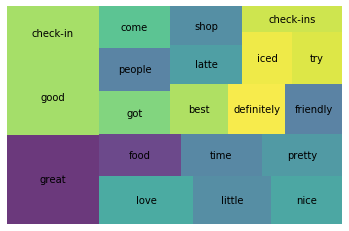

In [159]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

These are the overall top words, not from the best or worst reviews in particular, which is interesting as the words are by and large quite favorable.

In [108]:
df.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb..."


In [109]:
worst_df = df

In [164]:
#selecting the worst rows
# note: a rating of 3 was not considered best or worst here.

#old version
#worst_df = df[df['star_rating'] == " 1.0 star rating "] 

worst_df = df[df['star_rating'] <= '2'] 



In [165]:
worst_df.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens,star_ratings
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[11/25/2016, cool, decor!, good, drinks, nice,...",2
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1,"[12/2/2016, okay,, visiting, friends, la, tryi...",1


In [175]:
worst_df.shape

(738, 5)

In [176]:
shops.shape

(7616, 5)

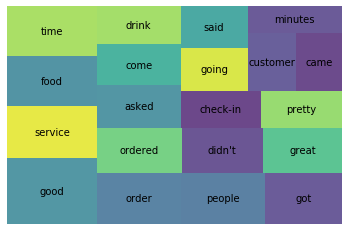

In [166]:
#making a new function to find the worst coffee shops
#to count just the tokens from one star...
#make a new df with just the

wc = count(worst_df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

These are the worst cafe's meaning they had a rating of 1 or 2 out of 5.
As a note: this was only 738 out of 7616 reviews.

In [ ]:
# now to make a best slice

In [114]:
best_df = df

In [167]:
#selecting the best rows
best_df = df[df['star_rating'] >= '4'] 

In [172]:
best_df.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens,star_ratings
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[11/25/2016, check-in, love, love, loved, atmo...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[12/2/2016, listed, date, night:, austin,, amb...",4


In [173]:
best_df.shape

(6140, 5)

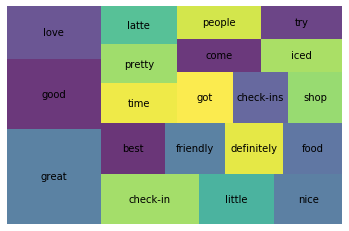

In [169]:
#making a new function to find the worst coffee shops
#to count just the tokens from one star...
#make a new df with just the

wc = count(best_df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

These are the top words from the best
As a note: this was only 738 out of 7616 reviews.

In [104]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

